# US vs China GDP

Follow this link

https://github.com/WillKoehrsen/Data-Analysis/blob/master/additive_models/Additive%20Models%20for%20Prediction.ipynb

In [1]:
import quandl
# pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = '_qXuCfszpQ8sVLHJex5R'

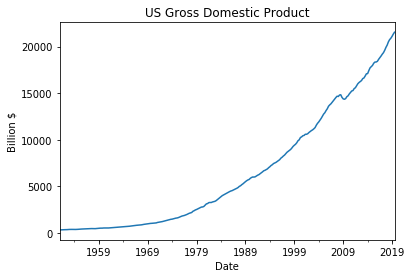

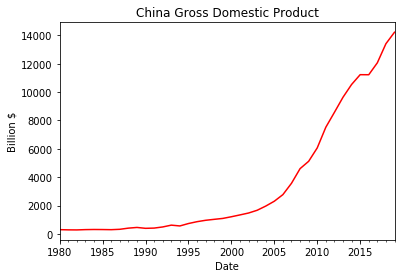

In [3]:
# Get data from quandl for US and China GDP
us_gdp = quandl.get('FRED/GDP', collapse='quarterly', start_date = '1950-12-31', end_date='2019-12-31')
china_gdp = quandl.get('ODA/CHN_NGDPD', collapse='yearly', start_date = '1950-12-31', end_date='2019-12-31')

us_gdp.plot(title = 'US Gross Domestic Product', legend=None);
plt.ylabel('Billion $'); 
china_gdp.plot(title = 'China Gross Domestic Product', color = 'r', legend=None);
plt.ylabel('Billion $');

In [4]:
us_gdp = us_gdp.reset_index(level=0)
us_gdp.head(10)

,Date,Value
0,1951-03-31,336.000
1,1951-06-30,344.090
2,1951-09-30,351.385
3,1951-12-31,356.178
4,1952-03-31,359.820
5,1952-06-30,361.030
6,1952-09-30,367.701
7,1952-12-31,380.812
8,1953-03-31,387.980
9,1953-06-30,391.749


In [5]:
china_gdp = china_gdp.reset_index(level=0)
china_gdp.head(10)

,Date,Value
0,1980-12-31,305.348
1,1981-12-31,290.827
2,1982-12-31,286.719
3,1983-12-31,307.677
4,1984-12-31,316.628
5,1985-12-31,312.616
6,1986-12-31,303.340
7,1987-12-31,330.303
8,1988-12-31,411.923
9,1989-12-31,461.066


In [6]:
gdp = pd.merge(china_gdp, us_gdp, how='left', on ='Date')\
      .rename(columns = {'Value_x':'China', 'Value_y': 'US'})

#gdp = gdp.drop('index', axis=1)
gdp.head(10)

,Date,China,US
0,1980-12-31,305.348,2985.557
1,1981-12-31,290.827,3280.818
2,1982-12-31,286.719,3402.561
3,1983-12-31,307.677,3794.706
4,1984-12-31,316.628,4148.551
5,1985-12-31,312.616,4444.094
6,1986-12-31,303.340,4657.627
7,1987-12-31,330.303,5007.994
8,1988-12-31,411.923,5399.509
9,1989-12-31,461.066,5747.237


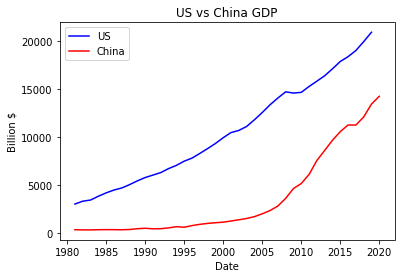

In [7]:
# Visualization

plt.plot(gdp.Date, gdp.US, label='US', c = 'b')
plt.plot(gdp.Date, gdp.China, label = 'China', c='r')
plt.xlabel('Date')
plt.ylabel('Billion $')
plt.title('US vs China GDP')
plt.legend()

## Make Prediction

In [8]:
import fbprophet

us_prophet = fbprophet.Prophet(changepoint_prior_scale = 0.2)
china_prophet = fbprophet.Prophet(changepoint_prior_scale = 0.2)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [9]:
us_gdp = us_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})
china_gdp = china_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})

In [10]:
us_prophet.fit(us_gdp)
china_prophet.fit(china_gdp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
us_prophet.changepoints

9     1953-06-30
18    1955-09-30
26    1957-09-30
35    1959-12-31
44    1962-03-31
53    1964-06-30
61    1966-06-30
70    1968-09-30
79    1970-12-31
88    1973-03-31
96    1975-03-31
105   1977-06-30
114   1979-09-30
123   1981-12-31
131   1983-12-31
140   1986-03-31
149   1988-06-30
158   1990-09-30
166   1992-09-30
175   1994-12-31
184   1997-03-31
193   1999-06-30
201   2001-06-30
210   2003-09-30
219   2005-12-31
Name: ds, dtype: datetime64[ns]

In [12]:
china_prophet.changepoints

1    1981-12-31
2    1982-12-31
4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
Name: ds, dtype: datetime64[ns]

In [13]:
# Make prediction

us_forecast = us_prophet.make_future_dataframe(periods = 50, freq = 'Y')
us_forecast = us_prophet.predict(us_forecast)

china_forecast = china_prophet.make_future_dataframe(periods = 50, freq = 'Y')
china_forecast = china_prophet.predict(china_forecast)

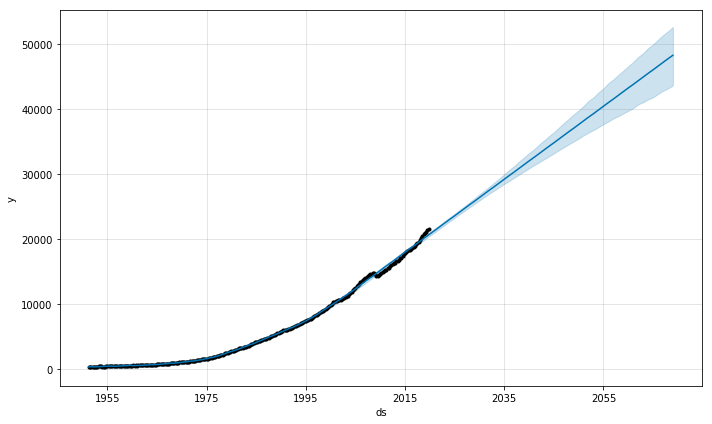

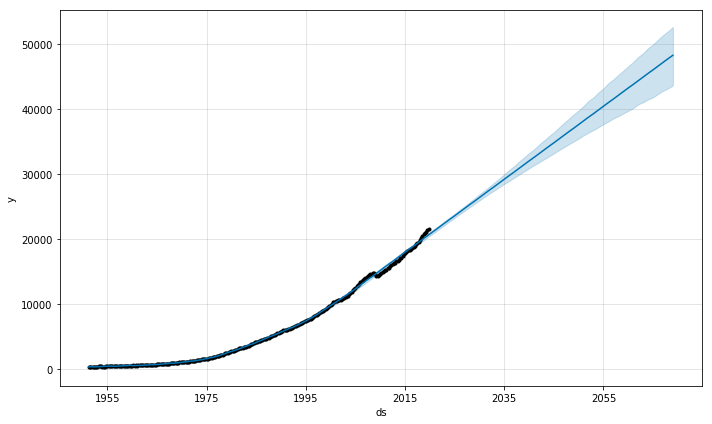

In [14]:
us_prophet.plot(us_forecast)

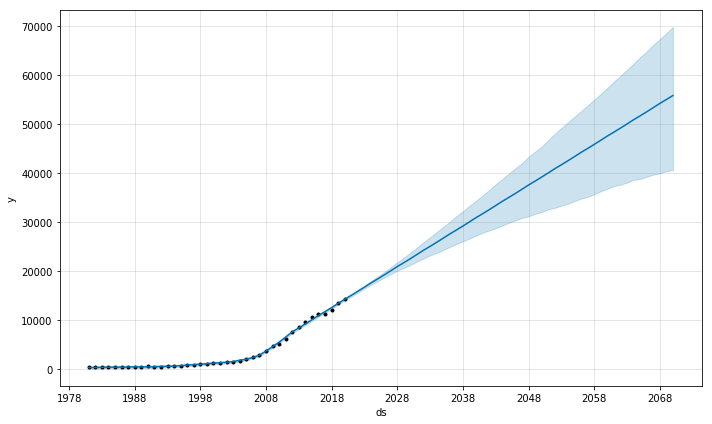

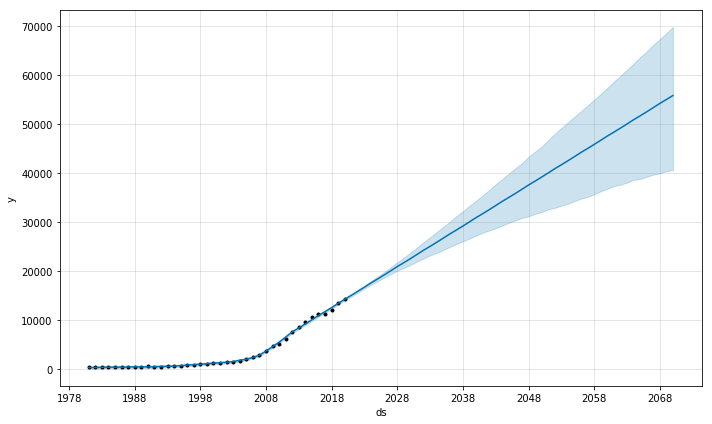

In [15]:
china_prophet.plot(china_forecast)

In [16]:
us_names = ['us_%s' % column for column in us_forecast.columns]
china_names = ['china_%s' % column for column in china_forecast.columns]

merge_us_forecast = us_forecast.copy()
merge_china_forecast = china_forecast.copy()

merge_us_forecast.columns = us_names
merge_china_forecast.columns = china_names

In [17]:
gdp_forecast = pd.merge(merge_us_forecast, merge_china_forecast, how = 'inner', left_on = 'us_ds', right_on = 'china_ds')

# Rename date column
gdp_forecast = gdp_forecast.rename(columns={'us_ds': 'Date'}).drop('china_ds', axis=1)
gdp_forecast.head()

,Date,us_trend,us_yhat_lower,us_yhat_upper,us_trend_lower,us_trend_upper,us_additive_terms,us_additive_terms_lower,us_additive_terms_upper,us_yearly,...,china_additive_terms,china_additive_terms_lower,china_additive_terms_upper,china_yearly,china_yearly_lower,china_yearly_upper,china_multiplicative_terms,china_multiplicative_terms_lower,china_multiplicative_terms_upper,china_yhat
0,1980-12-31,3355.544883,2693.705591,3256.494911,3355.544883,3355.544883,-398.424730,-398.424730,-398.424730,-398.424730,...,-678.194796,-678.194796,-678.194796,-678.194796,-678.194796,-678.194796,0.0,0.0,0.0,247.107206
1,1981-12-31,3620.545700,2947.147140,3501.920366,3620.545700,3620.545700,-392.362967,-392.362967,-392.362967,-392.362967,...,-685.393217,-685.393217,-685.393217,-685.393217,-685.393217,-685.393217,0.0,0.0,0.0,256.289033
2,1982-12-31,3899.572747,3254.346848,3823.878165,3899.572747,3899.572747,-386.846784,-386.846784,-386.846784,-386.846784,...,-673.064648,-673.064648,-673.064648,-673.064648,-673.064648,-673.064648,0.0,0.0,0.0,284.997798
3,1983-12-31,4178.599795,3527.447390,4076.676264,4178.599795,4178.599795,-381.880737,-381.880737,-381.880737,-381.880737,...,-641.246223,-641.246223,-641.246223,-641.246223,-641.246223,-641.246223,0.0,0.0,0.0,333.196414
4,1984-12-31,4488.760472,3822.892210,4366.640922,4488.760472,4488.760472,-398.424730,-398.424730,-398.424730,-398.424730,...,-678.194796,-678.194796,-678.194796,-678.194796,-678.194796,-678.194796,0.0,0.0,0.0,312.672910


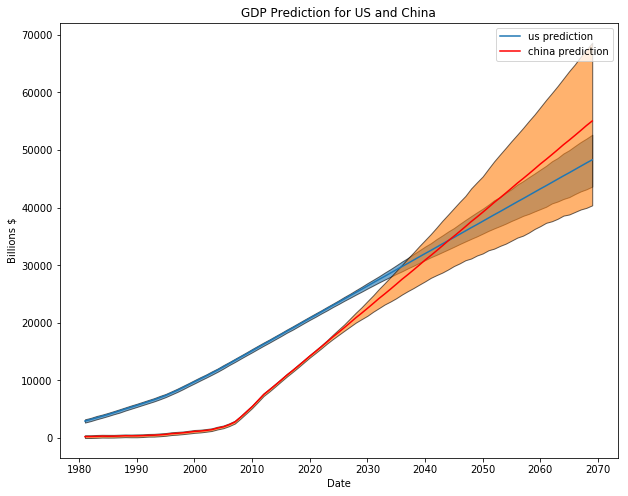

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
ax.plot(gdp_forecast['Date'], gdp_forecast['us_yhat'], label = 'us prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['us_yhat_upper'], 
                gdp_forecast['us_yhat_lower'], alpha=0.6, edgecolor = 'k');
ax.plot(gdp_forecast['Date'], gdp_forecast['china_yhat'], 'r', label = 'china prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['china_yhat_upper'], 
                gdp_forecast['china_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('GDP Prediction for US and China');

In [19]:
min(gdp_forecast.Date[gdp_forecast.us_yhat < gdp_forecast.china_yhat])

Timestamp('2044-12-31 00:00:00')

## If choose data before 2017...

In [20]:
# US GDP

us_gdp = quandl.get('FRED/GDP', collapse='quarterly', start_date = '1950-12-31', end_date='2016-12-31')
china_gdp = quandl.get('ODA/CHN_NGDPD', collapse='yearly', start_date = '1950-12-31', end_date='2016-12-31')

#us_gdp.plot(title = 'US Gross Domestic Product', legend=None, linewidth=8);
#plt.ylabel('Billion $')
#china_gdp.plot(title = 'China Gross Domestic Product', color = 'r', legend=None, linewidth=8);
#plt.ylabel('Billion $')

In [21]:
us_gdp = us_gdp.reset_index(level=0)
us_gdp.head(10)

,Date,Value
0,1951-03-31,336.000
1,1951-06-30,344.090
2,1951-09-30,351.385
3,1951-12-31,356.178
4,1952-03-31,359.820
5,1952-06-30,361.030
6,1952-09-30,367.701
7,1952-12-31,380.812
8,1953-03-31,387.980
9,1953-06-30,391.749


In [22]:
china_gdp = china_gdp.reset_index(level=0)
china_gdp.head(10)

,Date,Value
0,1980-12-31,305.348
1,1981-12-31,290.827
2,1982-12-31,286.719
3,1983-12-31,307.677
4,1984-12-31,316.628
5,1985-12-31,312.616
6,1986-12-31,303.340
7,1987-12-31,330.303
8,1988-12-31,411.923
9,1989-12-31,461.066


In [23]:
us_prophet = fbprophet.Prophet(changepoint_prior_scale = 0.2)
china_prophet = fbprophet.Prophet(changepoint_prior_scale = 0.2)

us_gdp = us_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})
china_gdp = china_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})

us_prophet.fit(us_gdp)
china_prophet.fit(china_gdp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# Make prediction

us_forecast = us_prophet.make_future_dataframe(periods = 50, freq = 'Y')
us_forecast = us_prophet.predict(us_forecast)

china_forecast = china_prophet.make_future_dataframe(periods = 50, freq = 'Y')
china_forecast = china_prophet.predict(china_forecast)

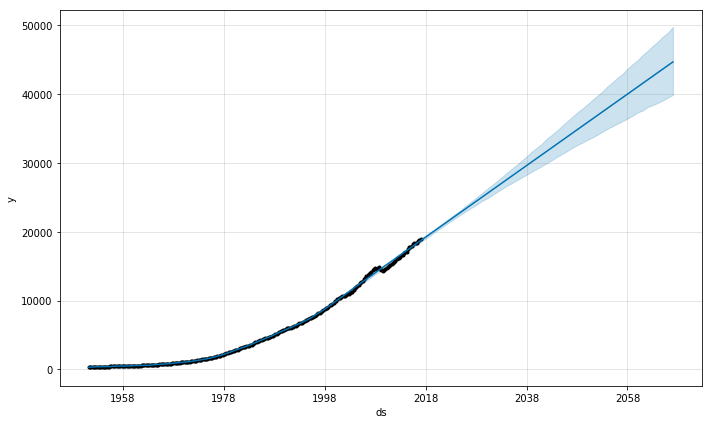

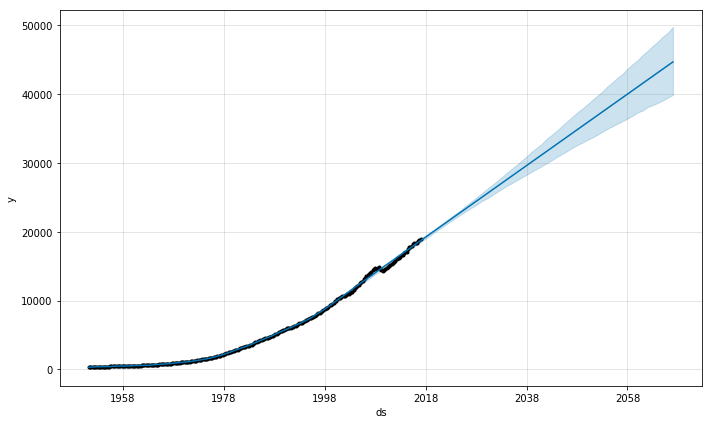

In [25]:
us_prophet.plot(us_forecast)

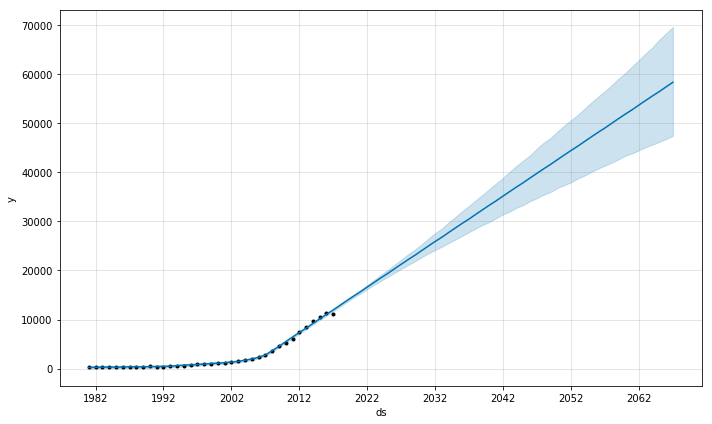

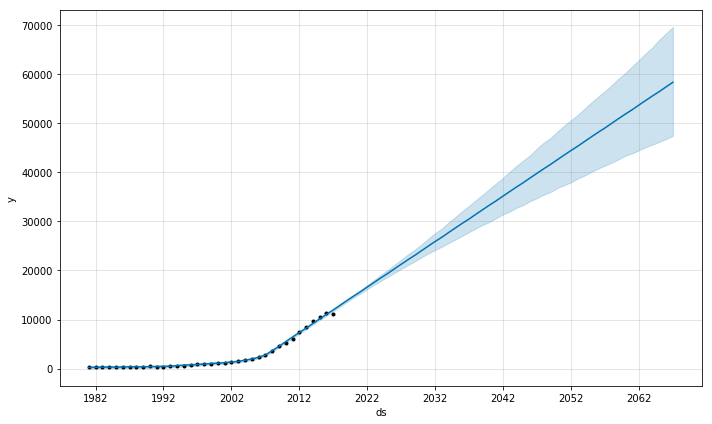

In [26]:
china_prophet.plot(china_forecast)

In [27]:
us_names = ['us_%s' % column for column in us_forecast.columns]
china_names = ['china_%s' % column for column in china_forecast.columns]

merge_us_forecast = us_forecast.copy()
merge_china_forecast = china_forecast.copy()

merge_us_forecast.columns = us_names
merge_china_forecast.columns = china_names

In [28]:
gdp_forecast = pd.merge(merge_us_forecast, merge_china_forecast, how = 'inner', left_on = 'us_ds', right_on = 'china_ds')

# Rename date column
gdp_forecast = gdp_forecast.rename(columns={'us_ds': 'Date'}).drop('china_ds', axis=1)
gdp_forecast.head()

,Date,us_trend,us_yhat_lower,us_yhat_upper,us_trend_lower,us_trend_upper,us_additive_terms,us_additive_terms_lower,us_additive_terms_upper,us_yearly,...,china_additive_terms,china_additive_terms_lower,china_additive_terms_upper,china_yearly,china_yearly_lower,china_yearly_upper,china_multiplicative_terms,china_multiplicative_terms_lower,china_multiplicative_terms_upper,china_yhat
0,1980-12-31,3759.164339,2756.653621,3187.925940,3759.164339,3759.164339,-788.072674,-788.072674,-788.072674,-788.072674,...,892.747248,892.747248,892.747248,892.747248,892.747248,892.747248,0.0,0.0,0.0,231.453303
1,1981-12-31,4021.297008,2999.446697,3438.749759,4021.297008,4021.297008,-788.731539,-788.731539,-788.731539,-788.731539,...,920.917814,920.917814,920.917814,920.917814,920.917814,920.917814,0.0,0.0,0.0,274.665644
2,1982-12-31,4293.767342,3302.375839,3730.466970,4293.767342,4293.767342,-787.968011,-787.968011,-787.968011,-787.968011,...,934.580963,934.580963,934.580963,934.580963,934.580963,934.580963,0.0,0.0,0.0,303.370565
3,1983-12-31,4596.913572,3605.004964,4031.166291,4596.913572,4596.913572,-785.781270,-785.781270,-785.781270,-785.781270,...,933.762539,933.762539,933.762539,933.762539,933.762539,933.762539,0.0,0.0,0.0,317.593917
4,1984-12-31,4900.992503,3888.801645,4307.986372,4900.992503,4900.992503,-788.072674,-788.072674,-788.072674,-788.072674,...,892.747248,892.747248,892.747248,892.747248,892.747248,892.747248,0.0,0.0,0.0,291.661613


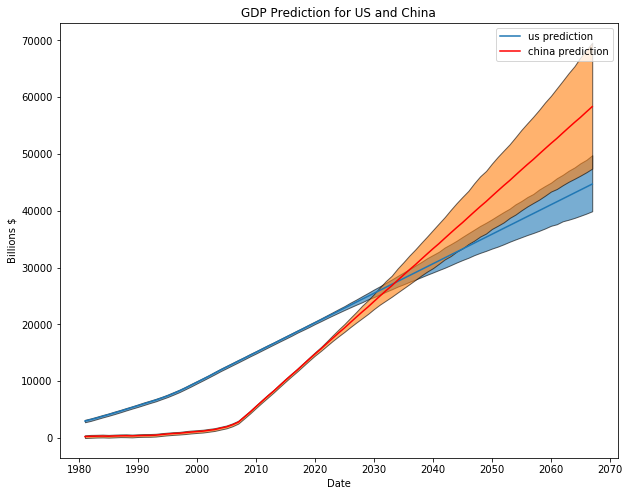

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));
ax.plot(gdp_forecast['Date'], gdp_forecast['us_yhat'], label = 'us prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['us_yhat_upper'], 
                gdp_forecast['us_yhat_lower'], alpha=0.6, edgecolor = 'k');
ax.plot(gdp_forecast['Date'], gdp_forecast['china_yhat'], 'r', label = 'china prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['china_yhat_upper'], 
                gdp_forecast['china_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('GDP Prediction for US and China');

In [30]:
min(gdp_forecast.Date[gdp_forecast.us_yhat < gdp_forecast.china_yhat])

Timestamp('2033-12-31 00:00:00')

The prediction by the end of 2016 is earlier than that in 2020, which means China economic growth has become slower. 